# Exercise 3 - actual energy regression in CMS

## Exercise 3.1

Up to now we have been looking at a rather simple regression technique, to communicate the basic ideas. The energy regression actually in use in CMS is more involved, utilizing machine learning techniques and extensive validation. While we will not be looking at the former, in this exercise we will get a taste of the latter. Let us begin by inspecting some of the 'raw' quantities i.e. those estimated from the detector and reconstruction algorithm, before the regression is applied, on simulated DY -> ee events.

In [1]:
from Tools.wrapper_egm_tools import *
tree = makeChain(cname = "ggNtuplizer/EventTree", flist = "/eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_*.root", njob = 10)
tree_large = makeChain(cname = "ggNtuplizer/EventTree", flist = "/eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_*.root", njob = 2)

Welcome to JupyROOT 6.26/04
filename = /eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_ntuples_102X_upgrade2018_realistic_v15-v1_GGNtupV2_109.root
filename = /eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_ntuples_102X_upgrade2018_realistic_v15-v1_GGNtupV2_118.root
filename = /eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_ntuples_102X_upgrade2018_realistic_v15-v1_GGNtupV2_127.root
filename = /eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_ntuples_102X_upgrade2018_realistic_v15-v1_GGNtupV2_136.root
filename = /eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_ntuples_102X_upgrade2018_realistic_v15-v1_GGNtupV2_145.root
filename = /eos/user/y/yian/Ntuples_CMSPODAS/0000/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8_ntuples_102X_upgrade2018_realistic_v15-v1_GGNtupV2_154.root
filename = /

Let's look at the distribution of raw SC energy:

In [2]:
h_escraw = makeHist(tree = tree, nbin = 95, xmin = 10, xmax = 200, variable = 'eleSCRawEn', cut = 'eleGenEn > 10')

<BarContainer object of 95 artists>

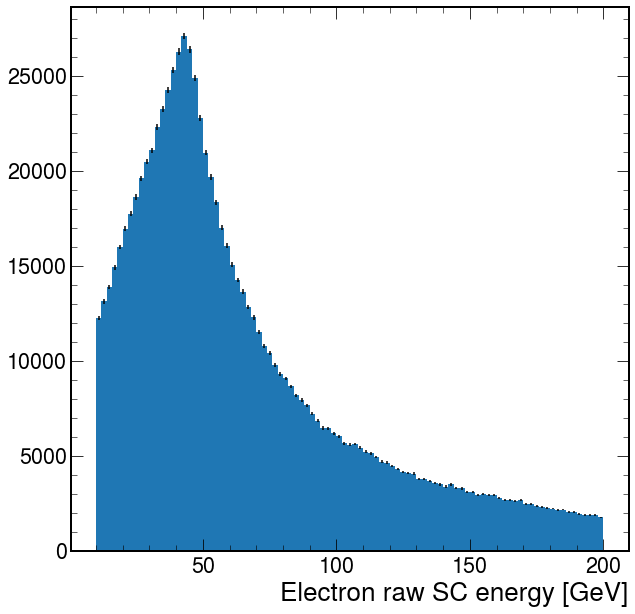

In [3]:
import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.CMS)
fig, ax = plt.subplots()
h_toplot = h_escraw
ax.set_xlabel(r'Electron raw SC energy [GeV]')
ax.bar(h_toplot.axis().centers(), height = h_toplot.counts(), yerr = h_toplot.errors(), width = h_toplot.axis().widths())

We see that it already peaks at around half the Z boson mass, as would be expected from a sample of electrons from Z decays. Not bad, considering the regression has not yet been applied! What about other out-of-the box quantities, such as the raw energy of the seed cluster (branch name `eleSeedRawEn`) or the estimate of the momentum magnitude of the electron in the inner tracker layer (`eleGsfTrkPInn`)? Plot them using the same binning/cut as the raw SC energy, and comment on your observations.

In [4]:
# raw seed cluster energy

In [5]:
# momentum magnitude of the electron in the inner tracker layer

Let's now get a feeling on how accurate these energy estimates are. One way to do this is to look at the ratio of these energies to the generated energy. One example is shown, using the raw SC energy and limiting ourselves to electron reconstructed within the EB, within a certain energy range.

<BarContainer object of 50 artists>

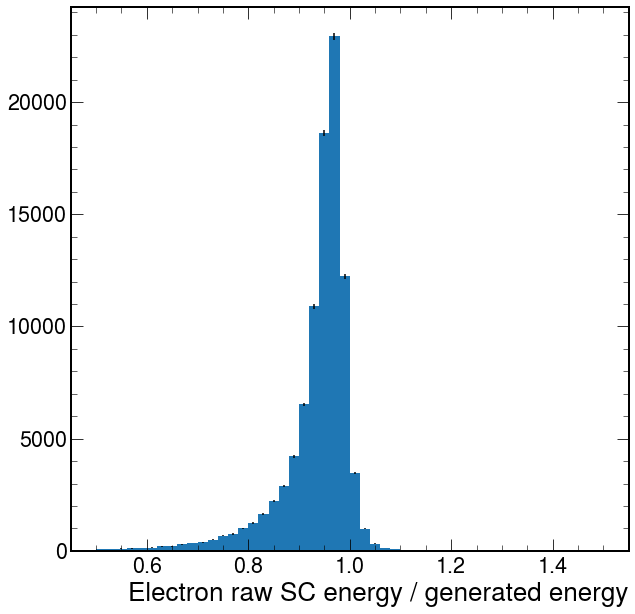

In [6]:
# note: the underlying code of this exercise is C++; so things like a < x < y does not work :-)
h_ratio_escraw = makeHist(tree = tree, nbin = 50, xmin = 0.5, xmax = 1.5, variable = 'eleSCRawEn/eleGenEn', cut = 'eleGenEn > 30 && eleGenEn < 40 && abs(eleSCEta) < 1.4442')
fig, ax = plt.subplots()
h_toplot = h_ratio_escraw
ax.set_xlabel(r'Electron raw SC energy / generated energy')
ax.bar(h_toplot.axis().centers(), height = h_toplot.counts(), yerr = h_toplot.errors(), width = h_toplot.axis().widths())

We see that the bulk of the distribution lies below 1, indicating that the measured energy is less than the generated one. Let's try to quantify this, by fitting the distribution with some analytical forms. This also can give us an estimate of how spread the distribution is, giving us an idea of the precision of our measurement. In CMS two types of functions are commonly used: DCB (for double Crystal-Ball) and Cruijff. We'll focus only on DCB for the moment.

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 #DeltaE      1.00000e+00  1.00000e-01    5.00000e-01  1.50000e+00
     2 #sigma_{CB}   5.00000e-02  2.49000e-02    2.00000e-04  5.00000e-01
     3 N_{S}        9.34990e+04  1.86998e+03    8.41491e+04  1.02849e+05
     4 alpha_{1}    1.20000e+00  6.00000e-01    0.00000e+00  2.00000e+01
     5 alpha_{2}    1.20000e+00  6.00000e-01    0.00000e+00  2.00000e+01
     6 n_{1}        2.00000e+00  4.95000e-01    1.01000e+00  5.00000e+03
     7 n_{2}        2.00000e+00  4.95000e-01    1.01000e+00  5.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO

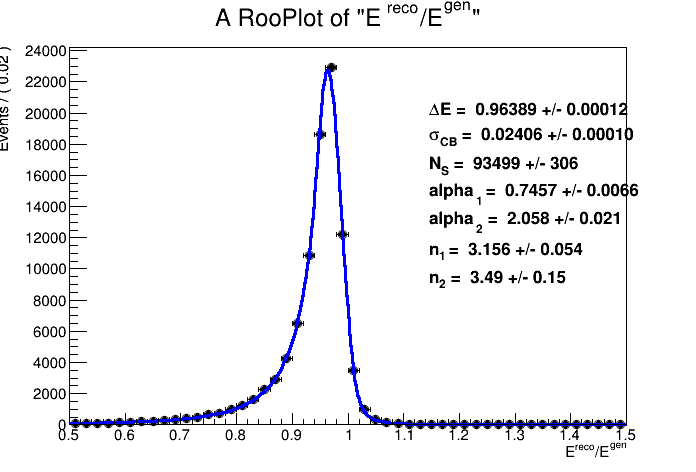

In [7]:
h_ratio_escraw.fit(function = 'DCB')

Visually we can see that a fairly good fit is achieved, and the mean parameter ($\Delta$E) is below 1, confirming that the measured energy underestimates the generated one. This makes the case for energy regression obvious; we want to correct for this mis-estimation. If you are interested, it is worthwhile to look at the ratio of other energy estimates, especially from the track, in different energy (e.g. at a lower energy e.g. 5 GeV < E < 10 GeV) and/or pseudorapidity (e.g. EE, 1.566 < abs(SC eta) < 2.5) bins. You are invited to explore around, and comment on your observations.

In [8]:
# GSF pinn ratio - compare with the same fit for raw SC

Before going further, let's talk about how the mis-estimation happens in the first place. For this, the so-called occupancy plot i.e. a color map of electron SC eta and phi will be useful. Can you comment on the plot? What do the holes imply?

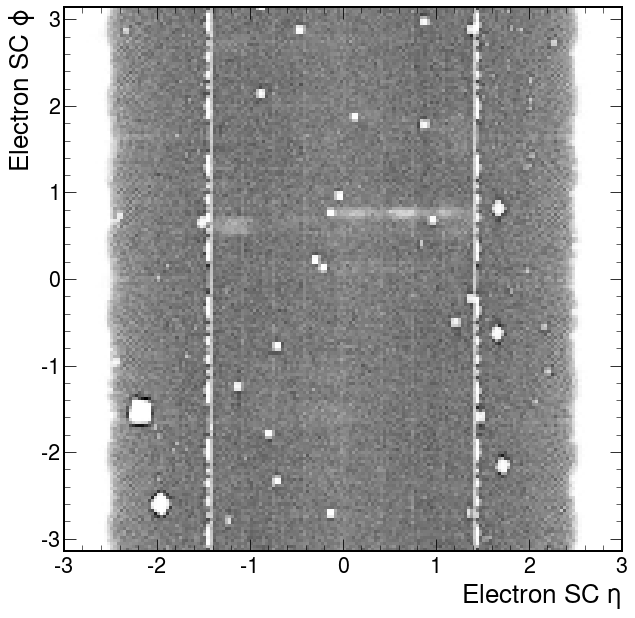

In [9]:
h_occupancy = makeColorMap(tree = tree_large, nbinx = 180, xmin = -3, xmax = 3, variablex = 'eleSCEta', nbiny = 180, ymin = -3.1416, ymax = 3.1416, variabley = 'eleSCPhi', cut = 'eleGenEn > 20')
fig, ax = plt.subplots()
h_toplot = h_occupancy
ax.set_xlabel(r'Electron SC $\eta$')
ax.set_ylabel(r'Electron SC $\phi$')
ax.pcolormesh(h_toplot.axis('x').edges(), h_toplot.axis('y').edges(), h_toplot.counts(), cmap = 'binary')

## Exercise 3.2

Here we will repeat the same exercise above, but using the regression-corrected energies. First, let's try a naive "correction" of simply scaling by the $\Delta$E parameter obtained from the fit onto the ratio of measured and generated energies, and redo the fit.

<BarContainer object of 50 artists>

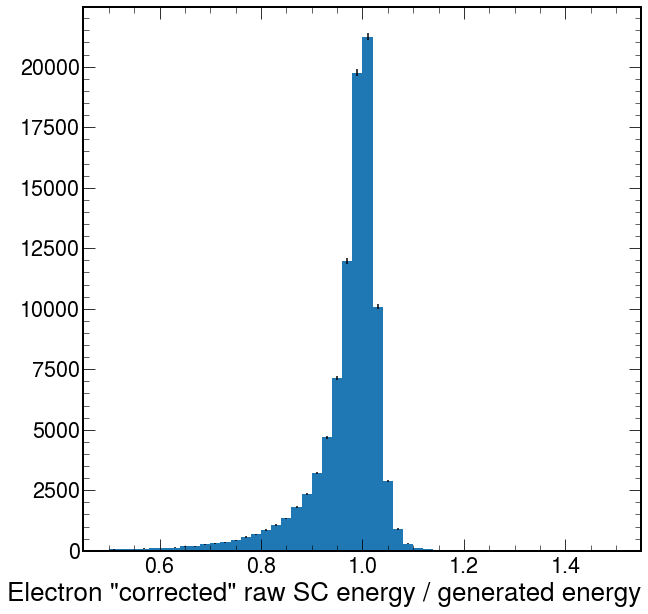

In [10]:
h_ratio_escraw_dE = makeHist(tree = tree, nbin = 50, xmin = 0.5, xmax = 1.5, variable = 'eleSCRawEn/(0.96389 * eleGenEn)', cut = 'eleGenEn > 30 && eleGenEn < 40 && abs(eleSCEta) < 1.4442')
fig, ax = plt.subplots()
h_toplot = h_ratio_escraw_dE
ax.set_xlabel(r'Electron "corrected" raw SC energy / generated energy')
ax.bar(h_toplot.axis().centers(), height = h_toplot.counts(), yerr = h_toplot.errors(), width = h_toplot.axis().widths())

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 #DeltaE      1.00000e+00  1.00000e-01    5.00000e-01  1.50000e+00
     2 #sigma_{CB}   5.00000e-02  2.49000e-02    2.00000e-04  5.00000e-01
     3 N_{S}        9.35570e+04  1.87114e+03    8.42013e+04  1.02913e+05
     4 alpha_{1}    1.20000e+00  6.00000e-01    0.00000e+00  2.00000e+01
     5 alpha_{2}    1.20000e+00  6.00000e-01    0.00000e+00  2.00000e+01
     6 n_{1}        2.00000e+00  4.95000e-01    1.01000e+00  5.00000e+03
     7 n_{2}        2.00000e+00  4.95000e-01    1.01000e+00  5.00000e+03
 **********
 **   21 **SET ERR         0.5
 **********
 **********
 **   22 **SET PRINT           1
 **********
 **********
 **   23 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO

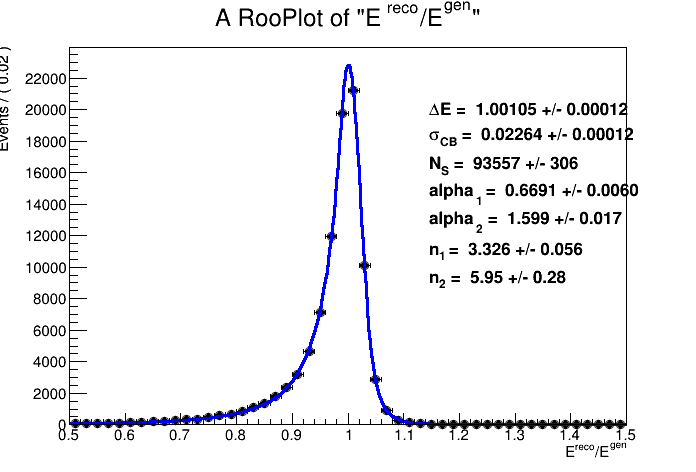

In [11]:
h_ratio_escraw_dE.fit(function = 'DCB')

Well, that's one way to correct things. :-) Why do you think we don't do things this way in CMS? Let's also look at the ratios after the energy regression has been applied. The branches of interest are `eleSCEn`, `eleEcalEn` and `eleEn`. What can you infer from their names? You might get a hint from the histogram name below.

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
 **********
 **   37 **SET PRINT           1
 **********
 **********
 **   38 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 #DeltaE      1.00000e+00  1.00000e-01    5.00000e-01  1.50000e+00
     2 #sigma_{CB}   5.00000e-02  2.49000e-02    2.00000e-04  5.00000e-01
     3 N_{S}        9.37320e+04  1.87464e+03    8.43588e+04  1.03105e+05
     4 alpha_{1}    1.20000e+00  6.00000e-01    0.00000e+00  2.00000e+01
     5 alpha_{2}    1.20000e+00  6.00000e-01    0.00000e+00  2.00000e+01
     6 n_{1}        2.00000e+00  4.95000e-01    1.01000e+00  5.00000e+03
     7 n_{2}        2.00000e+00  4.95000e-01    1.01000e+00  5.00000e+03
 **********
 **   39 **SET ERR         0.5
 **********
 **********
 **   40 **SET PRINT           1
 **********
 **********
 **   41 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO

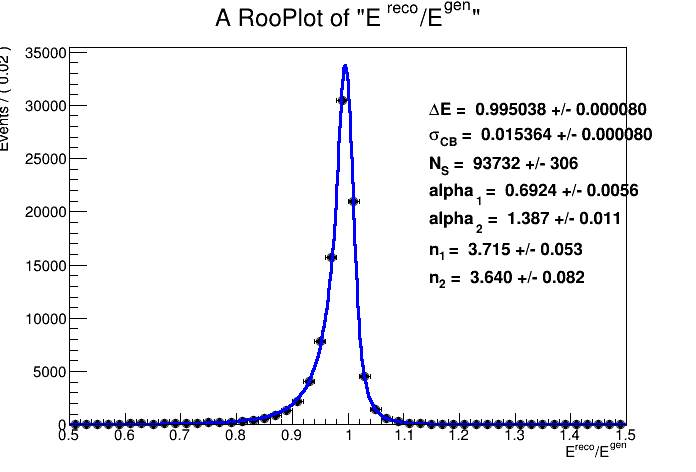

In [12]:
h_ratio_ecomb = makeHist(tree = tree, nbin = 50, xmin = 0.5, xmax = 1.5, variable = 'eleEn/eleGenEn', cut = 'eleGenEn > 30 && eleGenEn < 40 && abs(eleSCEta) < 1.4442')
h_ratio_ecomb.fit(function = 'DCB')

In [13]:
# compare different raw/regressed energy estimates in different energy/pseudorapidity ranges

Having a more accurate/precise energy estimate for electrons is cool, but is any of this relevant for physics? Absolutely! Let's make the case with one of the most popular distribution in HEP: the mass of the Z boson.

In [14]:
# TODO Z mass